# **Redes Neuronales**
# Regresión lineal -> Machine Learning -> NN

La función lineal deja su interpretación, en ML es una proyección lineal de los datos.

$ wx ⟶ $ Función de activación (Generalmente no lineal)

El caso más sencillo es una función de activación lineal.

# Clasificación Binaria

Consiste en que la salida (predicción) sea sólo de 2 tipos, true o false, sí o no, perro o gato, etc.

Podemos tener una red neuronal de capa de entradas que coincide con los datos, le sigue una capa con múltiples neuronas (según sea necesario) y conecta con una red de salida única.

Nuevamente, el caso más sencillo tiene una capa de entradas que lleva a una neurona que da el resultado como salida. Este caso es el que trabajaremos con la función sigmoide (para que la salida sea binaria). Se conoce también como *perceptron*.

*función escalón* No la usamos porque ocupamos una derivada contínua.

Cuando trabajemos data analisys, primero debemos de entender los datos.

Vamos a trabajar con imágenes para diferenciar entre gatos y perros. Los datos que tenemos son un conjunto de imágenes. Cada imágen está compuesta de pixeles, usualmente tienen 3 capas RGB. Tienen diferentes resoluciones.

La capa de entrada contendrá el vector de pixeles, entonces debemos transformar la imágen a un vector de pixeles. La salida será un 1 (sí es un gato), o un 0 (no es un gato). Ocupamos una red neuronal que nos lleve de la capa de entrada a la salida que buscamos. El vector con el que trabajamos puede ser de cualquier dimensión.

Los datos están compuestos por ($x$, $y$), donde $x$ es el número de datos y $y$ las soluciones (0 u 1). Para $m$ muestras tenemos ($x_1$, $y_1$),...,($x_m$, $y_m$) datos.

Queremos saber, dado $x$ el valor que predecimos $\hat{y} = P(y=1|x)$, con $0 \geq \hat{y} \geq 1$

Donde $\hat{y}=a=\sigma (w^Tx+b) $.
Dentro de la red neuronal, ocurrirá la secuencia $z \rightarrow a$, dónde $z=w^Tx+b$ y $a=\sigma (z) = \dfrac{1}{1+e^{-z}}$ es la función de activación. Posteriormente, la salida sería $a=\hat{y}$.

Si no aplicaramos la función de activación, tendríamos la regresión lineal convecional.

Luego calculamos la función costo:

$ J(w, b)=\dfrac{1}{m} \displaystyle \sum^m_{i=1} \left[\left( y^{(i)}log\left( \hat{y}^{(i)}\right)\right) + \left( 1-y^{(i)}\right)log\left(1-\hat{y}^{(i)}\right)\right]$

donde $y^{(i)}$ son los datos que tengo y $\hat{y}^{(i)}$ es la predicción, La función de distribución que mejor describe una salida binaria es una tipo Poisson. La función costo, entonces, depende de los datos y la predicción, y la predicción depende de los pesos. Por lo tanto, la función costo depende de los pesos, así que tenemos que minimizar la función costo: buscamos los pesos tal que la función costo es la mínima.

Aquí, no importa el valor que tengan los pesos (no tienen una interpretación sobre la imagen) siempre y cuando minimicen la función costo.

Buscar *propagation*, *back-propagation*

¿Cómo minimizamos la función costo como función de los pesos? **Derivando**, con el método **gradiente-descendiente**. Para saber que ya encontramos el mínimo, la función debe converger a un mínimo, decae muy lentamente.

# Gradiente descendiente

Debemos hacer multiples veces la ecuación siguiente, hasta que nos acercamos al valor mínimo de la función costo:

$ w=w-\alpha \dfrac{dJ}{dw}=w-\alpha dw $, con $ dw=\dfrac{1}{m}xdz $,

$ b=b-a\dfrac{dJ}{db}=b-\alpha db $, con $ db=\dfrac{1}{m}dz $

y la taza de aprendizaje es $dz=a-y$. (recordemos que $a$ es la sigmoide).

#Algoritmo de la regresión logística

* Meter el conjunto de datos
* Dar pesos iniciales
* Calcular z
* Calcular a
* Calcular la predicción
* Calcular el costo
* Calcular dw, db
* Calcular w, b
* Repetir desde el paso 2 hasta encontrar el mínimo

Lsa imágenes que usaremos tienen una resolución de 64 pixeles.

Tenemos un entrenamiento supervisado devido a que las imágenes con las que entrenaremos el modelo tienen en su etiqueta 'cat' o 'dog'. Podemos cambiar la cantidad de imágenes que damos para el entrenamiento (el código usa 100) y aplica el método a partir del archivo 4300.

Una vez que tenemos el conjunto de entrenamiento y prueba, lo pasaremos a un sólo gran arreglo largo que trae todos los pixeles.

Como límites para la $\hat{y}$, para redondear en la salida final:
* $>0.5 \longrightarrow 1$
* $< 0.5 \longrightarrow 1$

In [144]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cargamos los datos.

In [146]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files = glob.glob('/content/drive/MyDrive/Data/CATS_DOGS/*') # * quiere decir que agarramos todas las imágenes de la carpeta

In [147]:
len(files)

1787

In [148]:
#numero de pixeles para nuestras imágenes.
num_px=64

Preparamos el entrenamiento supervisado.

In [149]:
# Entrenamiento supervisado
train_x = []
train_y = []
for file in files[:100]:  # Entrenamos los datos con las primeras 100 imágenes
    img = Image.open(file)
    img = img.resize((num_px,num_px))  # Redefinimos la resolución de la imágen
    data = np.asarray(img)  # La guardamos en un vector
    train_x.append(data)  # Concatenamos los vectores en uno solo
    img.close()
    if 'dog' in file:
        train_y.append(0)  # 0 si es un perro
    if 'cat' in file:
        train_y.append(1)  # 1 si es un gato
train_y = np.asarray(train_y)
train_x = np.asarray(train_x)

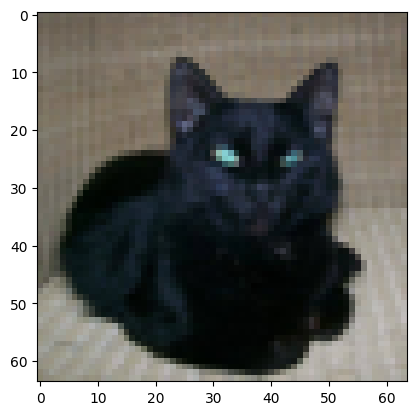

In [150]:
plt.imshow(train_x[0])

Preparamos el dataset de prueba.

In [151]:
test_x = []
test_y = []
for file in files[100:]:  # Hacemos la prueba a partir del dato número 100 porque entrenamos con los primeros 100
    #print(file)
    img = Image.open(file)
    img = img.resize((num_px,num_px))
    data = np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(0)
    if 'cat' in file:
        test_y.append(1)
test_y = np.asarray(test_y)
test_x = np.asarray(test_x)

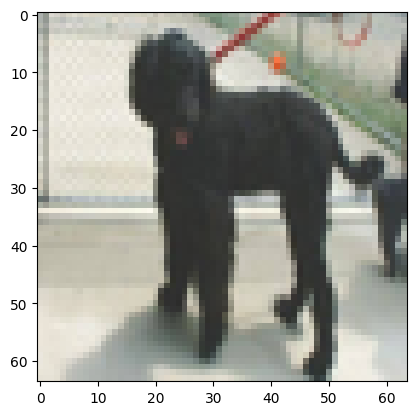

In [152]:
plt.imshow(test_x[1])

Hacemos una transformación de los arreglos que contienen las imagenes para que sean arreglos de una dimensión.

In [153]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

Normalizamos las imágenes.

In [154]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

Ya esta listo nuestro set de datos para poder trabajar con el.

Ahora, procedemos a aplicar el algoritmo de regresión logística.

Primero, definimos las funciones que utilizaremos

In [155]:
# Para inicializar los parámetros
def para_ini(dim):
  w = np.zeros((dim, 1))
  b = 0
  return w, b

In [156]:
# Para el sigmoide
def sigmoide(z):
  a = 1 / (1 + np.exp(-z))
  return a

In [157]:
# Para calcular el costo
def costo (a, train_y):
  m = train_y.shape[1]
  cost = -1 / m * np.sum(train_y * np.log(a) + (1 - train_y) * np.log(1 - a))
  return cost

In [158]:
# Para la propagación ascendente para la salida del modelo
def prop_a(w, b, train_x):
  z = np.dot(w.T, train_x) + b
  a = sigmoide(z)
  return a

In [159]:
# Para la propagación descendente y calcular los gradientes
def prop_d(train_x, train_y, a):
  m = train_x.shape[1]
  dz = a - train_y
  dw = np.dot(train_x, dz.T) / m
  db = np.sum(dz) / m
  return dw, db

In [160]:
# Para actualizar los parámetros
def para_a(w, b, dw, db, taza):
  w -= taza * dw
  b -= taza * db
  return w, b

In [161]:
# Para el método gradiente descendiente
def grad_des(train_x, train_y, w, b, taza):
  z = np.dot(w.T, train_x) + b
  a = sigmoide(z)
  cost = costo(a, train_y)

  dz = a - train_y
  dw, db = prop_d(train_x, train_y, a)

  w, b = para_a(w, b, dw, db, taza)
  return w, b, cost

In [162]:
# Para el modelo de regresión logística con el método gradiente descendente
def modelo(train_x, train_y, test_x, test_y, iteraciones, taza):
  w, b = para_ini(train_x.shape[0])

  for i in range(iteraciones):
    w, b, cost = grad_des(train_x, train_y, w, b, taza)
  return w, b

In [163]:
# Definimos el número de iteraciones y la taza de aprendizaje
iteraciones = 1500
taza = 0.01

# Entrenamos el modelo con el método
train_w, train_b = modelo(train_set_x, train_set_y, test_set_x, test_set_y, iteraciones, taza)

# Evaluamos en el conjunto de prueba
evals = np.round(prop_a(train_w, train_b, test_set_x))

accuracy = np.mean(evals == test_set_y)
print(f"Accuracy in the data train: {accuracy * 100}%")

Accuracy in the data train: 46.23592175459395%


Ponemos a prueba con 5 datos al azar:

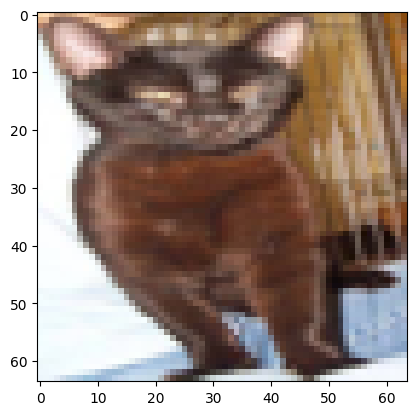

Predicción: 1.0

Es un gato


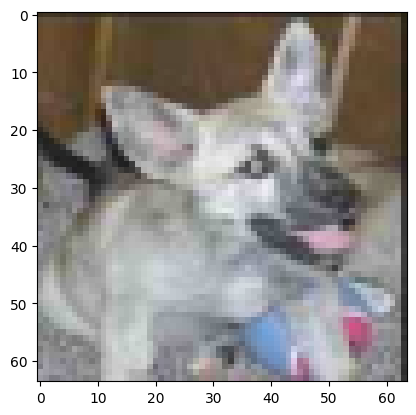

Predicción: 1.0

Es un gato


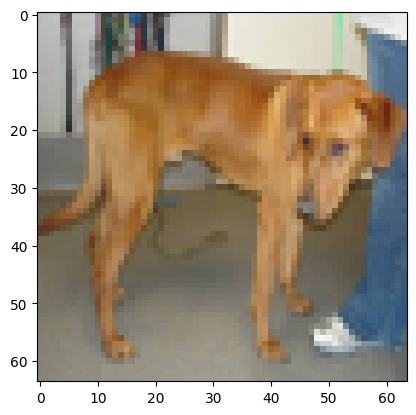

Predicción: 1.0

Es un gato


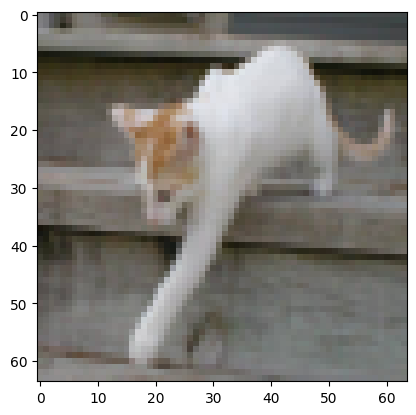

Predicción: 1.0

Es un gato


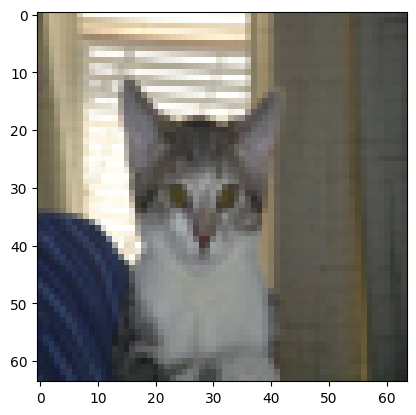

Predicción: 1.0

Es un gato


In [164]:
for i in range(5):
  index = np.random.randint(0, test_set_x.shape[1])
  image = Image.fromarray((test_set_x[:, index] * 255).astype(np.uint8).reshape((num_px, num_px, 3)))
  plt.imshow(image)
  plt.show()
  print(f"Predicción: {evals[0, index]}\n")
  if evals[0, index] == 1:
      print("Es un gato")
  else:
      print("Es un perro")